# IMPORTS


In [1]:
from utils import *
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import matplotlib.pyplot as plt

from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

## 1- Read Dataset


In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Uncomment to read the dataset online


In [3]:

#!pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# # data (as pandas dataframes)
# X = phiusiil_phishing_url_website.data.features
# y = phiusiil_phishing_url_website.data.targets

# # metadata
# print(phiusiil_phishing_url_website.metadata)

# # variable information
# print(phiusiil_phishing_url_website.variables)

## 2- Preprocessing & Visualization


In [4]:
# load the dataset
DATASET_PATH = "./dataset/PhiUSIIL_Phishing_URL_Dataset.csv"

In [5]:
# find spark
spark = SparkSession.builder.appName("PhishingURL").getOrCreate()
sc = spark.sparkContext

In [6]:
# read dataset
phishing_rdd = spark.read.csv(DATASET_PATH, header=True, inferSchema=True)

In [7]:
# show rdd header and first 10 rows
phishing_rdd.show(10)

+----------+--------------------+---------+--------------------+------------+----------+---+------------------+--------------------+-----------------+-----------+---------+-------------+--------------+------------------+----------------+----------------+----------------+---------------+---------------+---------------+--------------+------------------+--------------------------+---------------------+-------+----------+-----------------+--------+--------------------+---------------------+------------------+----------+------+------------+---------------+----------------+--------------+---------+----------+---------------------+------------+---------------+---------------+----------------+----+---+------+----------------+---------+-------+------+-----------+------------+---------------+-----+
|  FILENAME|                 URL|URLLength|              Domain|DomainLength|IsDomainIP|TLD|URLSimilarityIndex|CharContinuationRate|TLDLegitimateProb|URLCharProb|TLDLength|NoOfSubDomain|HasObfuscation

In [8]:
# drop filename column since it's not relevant
phishing_rdd = phishing_rdd.drop("filename")

In [9]:
# show rows, columns, and schema
print("Rows: ", phishing_rdd.count())
print("Columns: ", len(phishing_rdd.columns))
print("Schema: ", phishing_rdd.printSchema())

Rows:  235795
Columns:  55
root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpers

In [10]:
# show rows, columns, and schema
print("Rows: ", phishing_rdd.count())
print("Columns: ", len(phishing_rdd.columns))
print("Schema: ", phishing_rdd.printSchema())

Rows:  235795
Columns:  55
root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpers

In [11]:
# show rows, columns, and schema
print("Rows: ", phishing_rdd.count())
print("Columns: ", len(phishing_rdd.columns))
print("Schema: ", phishing_rdd.printSchema())


Rows:  235795
Columns:  55
root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpers

In [12]:
# show rows, columns, and schema
print("Rows: ", phishing_rdd.count())
print("Columns: ", len(phishing_rdd.columns))
print("Schema: ", phishing_rdd.printSchema())

Rows:  235795
Columns:  55
root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpers

In [32]:
# columns to be used for visualization

hist_columns = ["URLLength",  # integer
                "URLSimilarityIndex",  # : double
                "CharContinuationRate",  # : double
                "TLDLegitimateProb",  # : double
                "URLCharProb",  # : double
                "NoOfSubDomain",  # : integer
                "LetterRatioInURL",  # : double
                "DegitRatioInURL",  # : double
                "SpacialCharRatioInURL",  # : double
                "LineOfCode",  # num of html lines : integer
                "LargestLineLength",  # : integer
                "URLTitleMatchScore",  # : double

                "NoOfURLRedirect",  # integer
                "NoOfSelfRedirect",  # integer
                "NoOfPopup",  # : integer
                "NoOfiFrame",  # : integer
                "NoOfImage",  # : integer
                "NoOfCSS",  # : integer
                "NoOfJS",  # : integer
                "NoOfSelfRef",  # : integer
                "NoOfEmptyRef",  # : integer
                "NoOfExternalRef",  # : integer
                ]

binary_columns = ["IsHTTPS",
                  "HasTitle",
                  "HasFavicon",
                  "Robots",
                  "IsResponsive",
                  "HasDescription",
                  "HasExternalFormSubmit",
                  "HasSocialNet",
                  "HasSubmitButton",
                  "HasHiddenFields",
                  "HasPasswordField",
                  "Bank",
                  "Pay",
                  "Crypto",
                  "HasCopyrightInfo",
                  ]


print("Histograms length: ", len(hist_columns))
print("Binary columns length: ", len(binary_columns))

Histograms length:  22
Binary columns length:  15


In [14]:
# check the number of missing values in each column
print("Missing values: ")
for col in phishing_rdd.columns:
    print(col, ":", phishing_rdd.where(phishing_rdd[col].isNull()).count())

Missing values: 
URL : 0
URLLength : 0
Domain : 0
DomainLength : 0
IsDomainIP : 0
TLD : 0
URLSimilarityIndex : 0
CharContinuationRate : 0
TLDLegitimateProb : 0
URLCharProb : 0
TLDLength : 0
NoOfSubDomain : 0
HasObfuscation : 0
NoOfObfuscatedChar : 0
ObfuscationRatio : 0
NoOfLettersInURL : 0
LetterRatioInURL : 0
NoOfDegitsInURL : 0
DegitRatioInURL : 0
NoOfEqualsInURL : 0
NoOfQMarkInURL : 0
NoOfAmpersandInURL : 0
NoOfOtherSpecialCharsInURL : 0
SpacialCharRatioInURL : 0
IsHTTPS : 0
LineOfCode : 0
LargestLineLength : 0
HasTitle : 0
Title : 0
DomainTitleMatchScore : 0
URLTitleMatchScore : 0
HasFavicon : 0
Robots : 0
IsResponsive : 0
NoOfURLRedirect : 0
NoOfSelfRedirect : 0
HasDescription : 0
NoOfPopup : 0
NoOfiFrame : 0
HasExternalFormSubmit : 0
HasSocialNet : 0
HasSubmitButton : 0
HasHiddenFields : 0
HasPasswordField : 0
Bank : 0
Pay : 0
Crypto : 0
HasCopyrightInfo : 0
NoOfImage : 0
NoOfCSS : 0
NoOfJS : 0
NoOfSelfRef : 0
NoOfEmptyRef : 0
NoOfExternalRef : 0
label : 0


In [15]:
# keep thee unique values of the url column
unique_urls = phishing_rdd.select("url").distinct()
print("Unique URLs: ", unique_urls.count())
filtered_rdd = phishing_rdd.dropDuplicates(["url"])

Unique URLs:  235370


In [16]:
# drop NON-informative columns
filtered_rdd = filtered_rdd.drop("Domain")
filtered_rdd = filtered_rdd.drop("DomainLength")
filtered_rdd = filtered_rdd.drop("IsDomainIP")
filtered_rdd = filtered_rdd.drop("HasObfuscation")
filtered_rdd = filtered_rdd.drop("NoOfObfuscatedChar")
filtered_rdd = filtered_rdd.drop("ObfuscationRatio")
filtered_rdd = filtered_rdd.drop("Title")

In [17]:
print(filtered_rdd.count())
filtered_rdd.columns

235370


['URL',
 'URLLength',
 'TLD',
 'URLSimilarityIndex',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'NoOfOtherSpecialCharsInURL',
 'SpacialCharRatioInURL',
 'IsHTTPS',
 'LineOfCode',
 'LargestLineLength',
 'HasTitle',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'HasFavicon',
 'Robots',
 'IsResponsive',
 'NoOfURLRedirect',
 'NoOfSelfRedirect',
 'HasDescription',
 'NoOfPopup',
 'NoOfiFrame',
 'HasExternalFormSubmit',
 'HasSocialNet',
 'HasSubmitButton',
 'HasHiddenFields',
 'HasPasswordField',
 'Bank',
 'Pay',
 'Crypto',
 'HasCopyrightInfo',
 'NoOfImage',
 'NoOfCSS',
 'NoOfJS',
 'NoOfSelfRef',
 'NoOfEmptyRef',
 'NoOfExternalRef',
 'label']

In [18]:
# one HOT Encoding for categorial feauters

# Indexing the categorical column
string_indexer = StringIndexer(inputCol="TLD", outputCol="TLD" + "_index")

# Applying one-hot encoding
encoder = OneHotEncoder(
    inputCols=["TLD" + "_index"], outputCols=["TLD_Encoded"])

# Define the pipeline
pipeline = Pipeline(stages=[string_indexer, encoder])

# Fit the pipeline to the data
pipeline_model = pipeline.fit(filtered_rdd)

# Transform the data
df_encoded = pipeline_model.transform(filtered_rdd)

print(df_encoded.count())

# Show the result
df_encoded.show(10)

235370
+--------------------+---------+---+------------------+--------------------+-----------------+-----------+---------+-------------+----------------+----------------+---------------+---------------+---------------+--------------+------------------+--------------------------+---------------------+-------+----------+-----------------+--------+---------------------+------------------+----------+------+------------+---------------+----------------+--------------+---------+----------+---------------------+------------+---------------+---------------+----------------+----+---+------+----------------+---------+-------+------+-----------+------------+---------------+-----+---------+-----------------+
|                 URL|URLLength|TLD|URLSimilarityIndex|CharContinuationRate|TLDLegitimateProb|URLCharProb|TLDLength|NoOfSubDomain|NoOfLettersInURL|LetterRatioInURL|NoOfDegitsInURL|DegitRatioInURL|NoOfEqualsInURL|NoOfQMarkInURL|NoOfAmpersandInURL|NoOfOtherSpecialCharsInURL|SpacialCharRatioInUR

data Spiliting


In [19]:
df_train, df_test = df_encoded.randomSplit([0.75, 0.25], seed=42)

# generate descriptive statistics

filtered_rdd.describe().show()


In [20]:
# split the dataset into the rows that are real and phishing based on the label column
# where 1 is phishing and 0 is real
all_legitimate_rdd = filtered_rdd.where(filtered_rdd["label"] == 1)
all_phishing_rdd = filtered_rdd.where(filtered_rdd["label"] == 0)

In [21]:
# show the number of the legitimate and phishing URLs
print("Legitimate URLs: ", all_legitimate_rdd.count())
print("Phishing URLs: ", all_phishing_rdd.count())

Legitimate URLs:  134850
Phishing URLs:  100520


In [22]:
# # show histograms for integer columns in the dataset to understand the distribution of the data


# # convert the rdd to a pandas dataframe
# phishing_df = phishing_rdd.toPandas()

# # plot histograms for integer columns
# for col in phishing_df.select_dtypes(include=["int"]).columns:
#     sns.histplot(phishing_df[col])
#     plt.title(col)
#     plt.show()

In [23]:
# Compute descriptive statistics for numeric columns
numeric_cols = [col for col, dtype in df_train.dtypes if dtype ==
                'int' or dtype == 'double']
numeric_stats = df_train.select(numeric_cols).describe().toPandas()

print(numeric_stats)

  summary          URLLength  URLSimilarityIndex CharContinuationRate  \
0   count             177041              177041               177041   
1    mean  34.46899870651431   78.51084209214075   0.8460794072893132   
2  stddev  36.86756887827503  28.937714102963263  0.21637206310256016   
3     min                 13         0.304877307                  0.0   
4     max               4274               100.0                  1.0   

     TLDLegitimateProb           URLCharProb           TLDLength  \
0               177041                177041              177041   
1   0.2604285895306641   0.05576824888296493   2.764749408329144   
2  0.25162394208136274  0.010580574285191286  0.6014980174901869   
3                  0.0           0.001082764                   2   
4            0.5229071           0.090680686                  13   

        NoOfSubDomain    NoOfLettersInURL     LetterRatioInURL  ...  \
0              177041              177041               177041  ...   
1  1.16493

In [24]:

# 

# sample_data=df_train.sample(fraction=0.1,seed=42)
# pandas_df = df_train.toPandas()

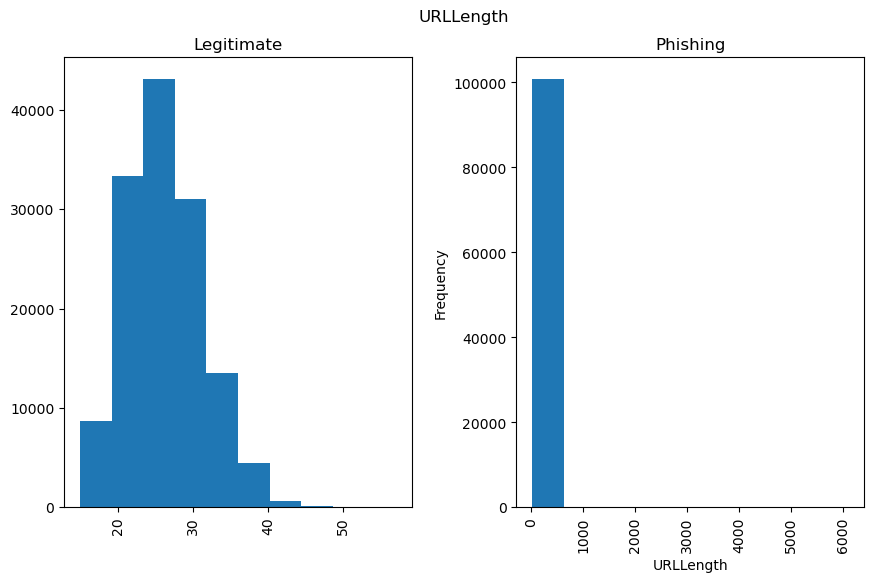

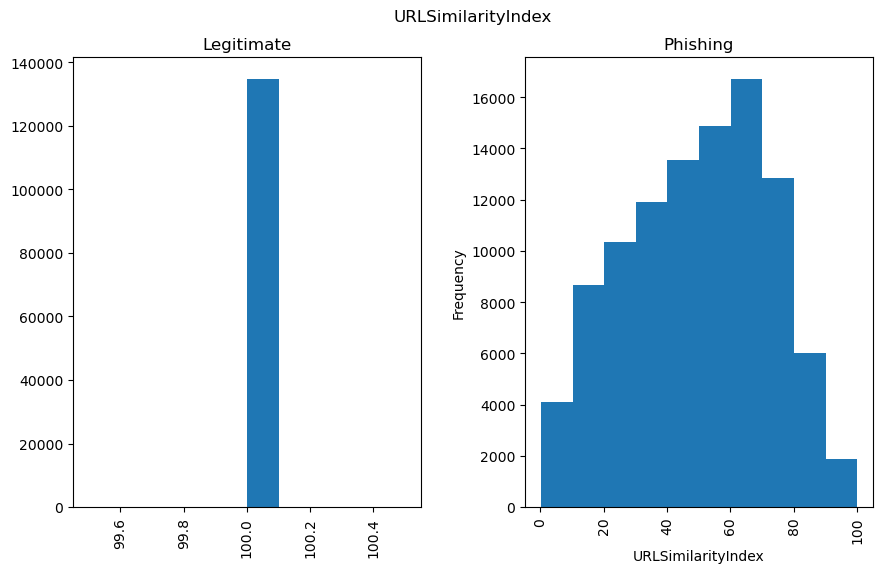

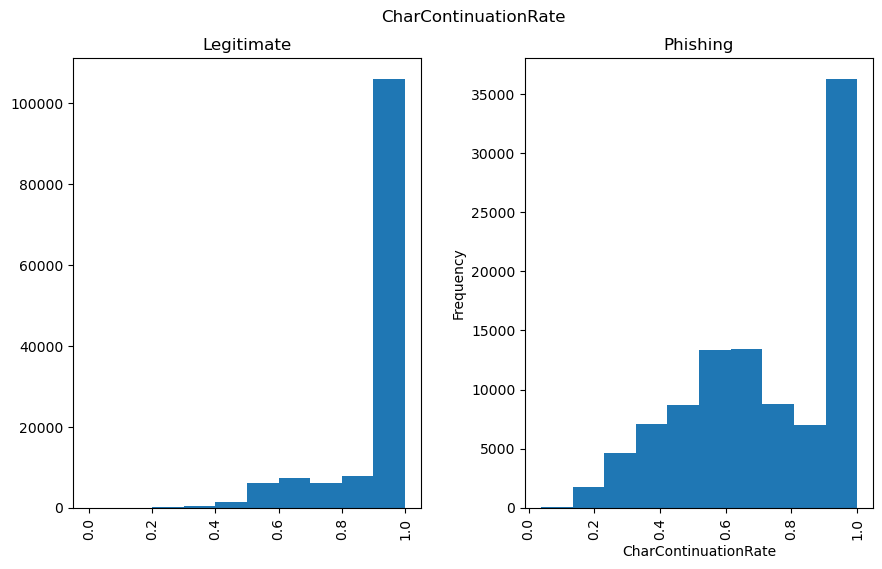

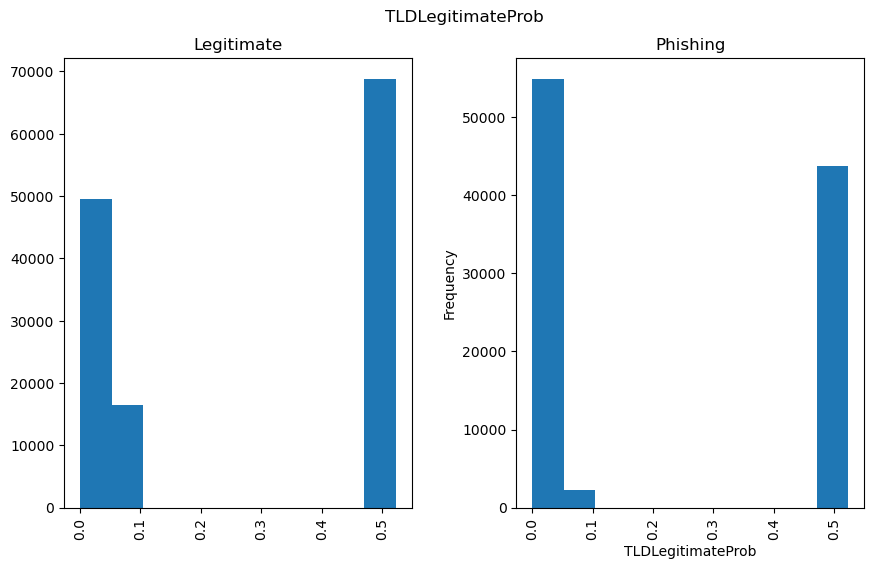

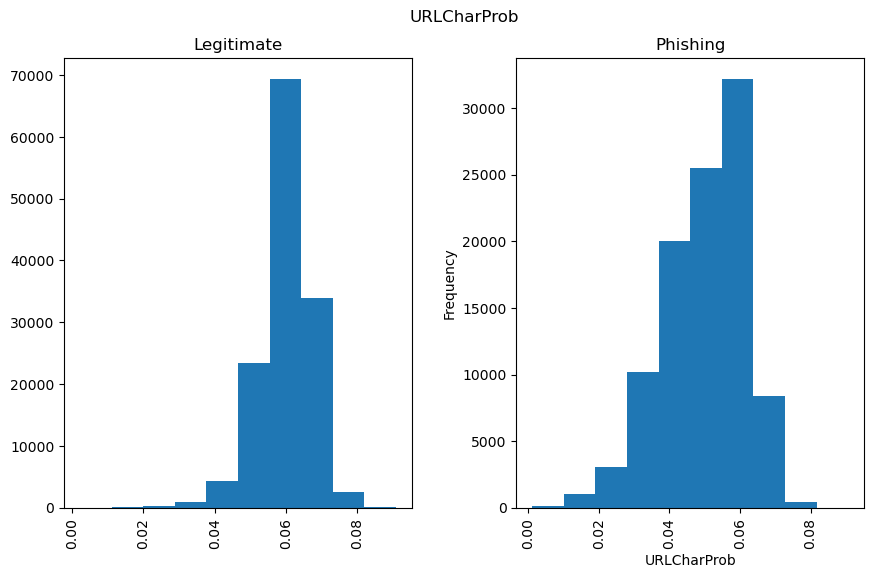

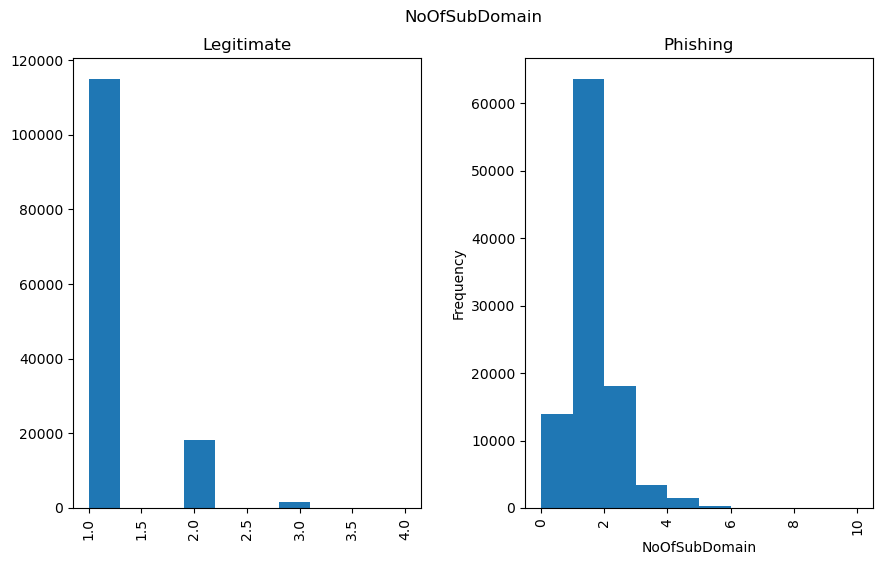

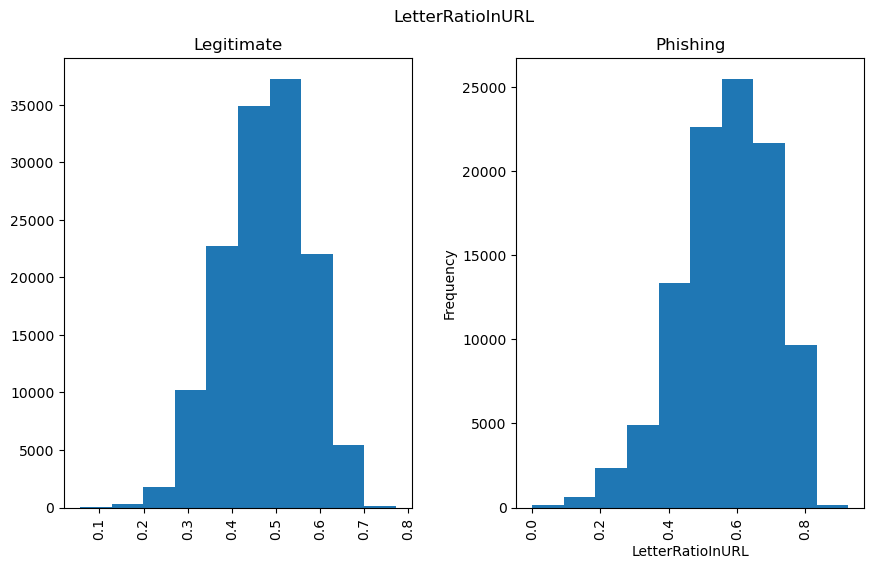

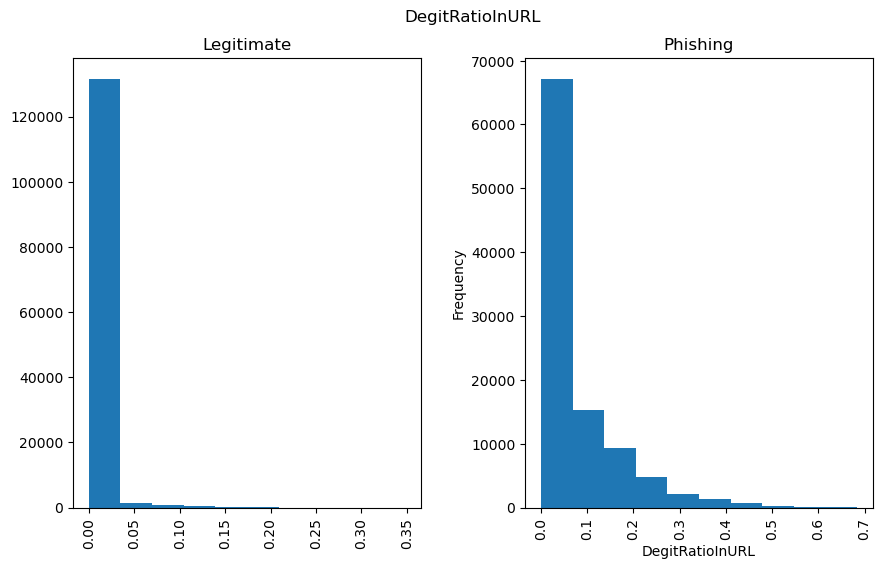

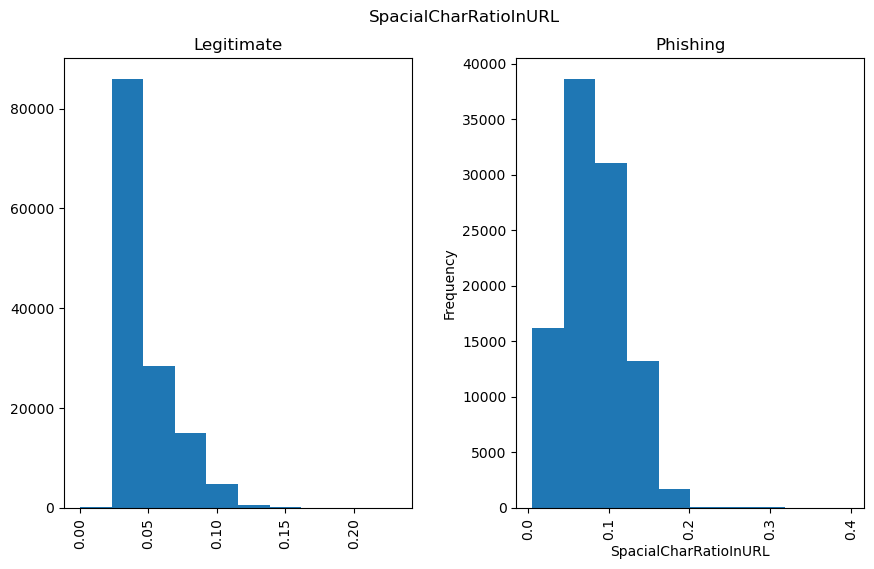

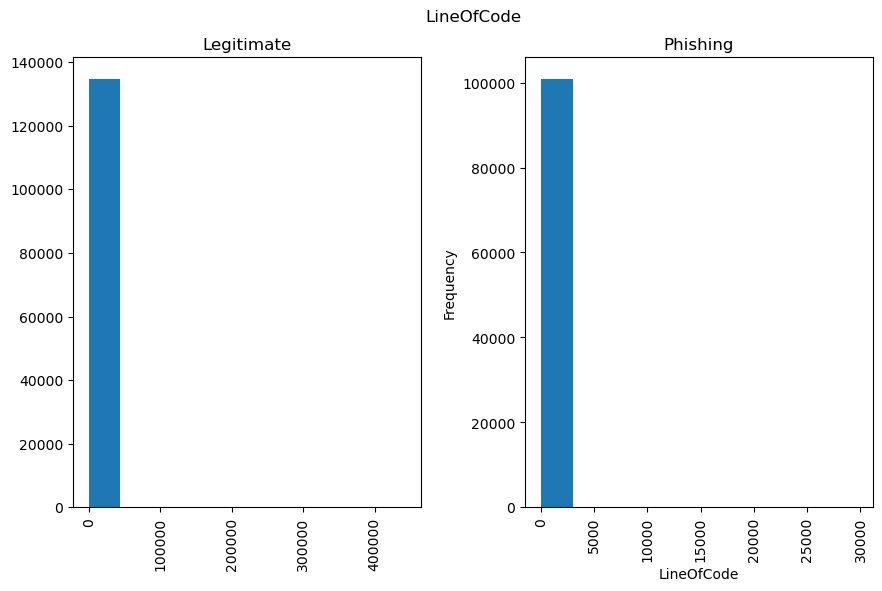

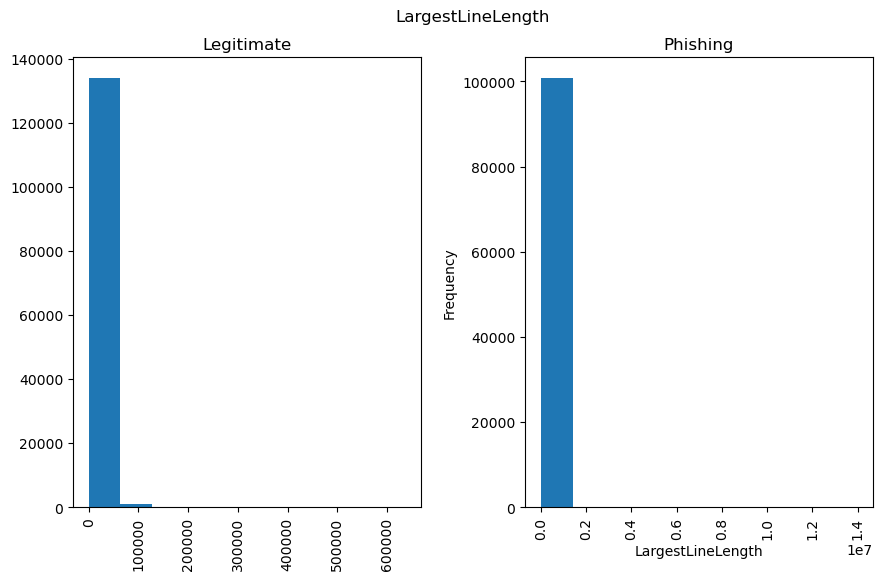

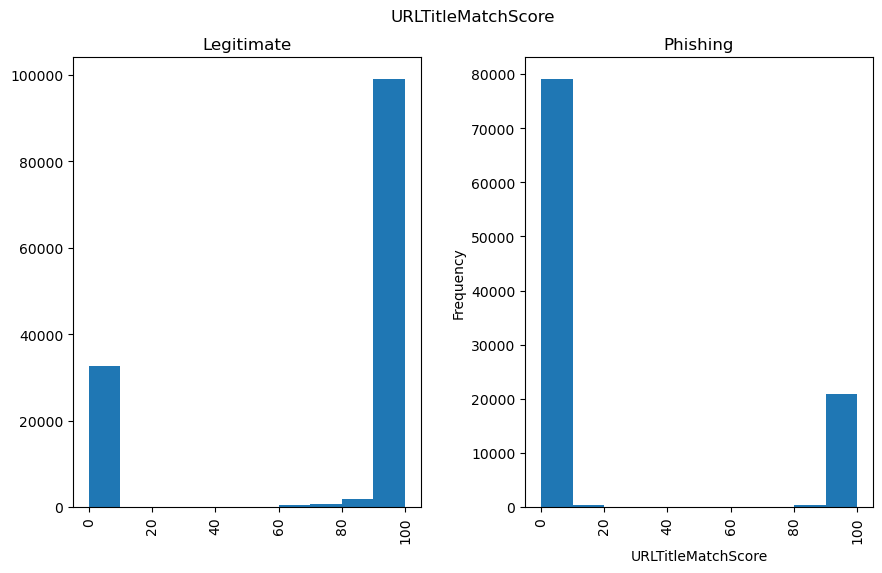

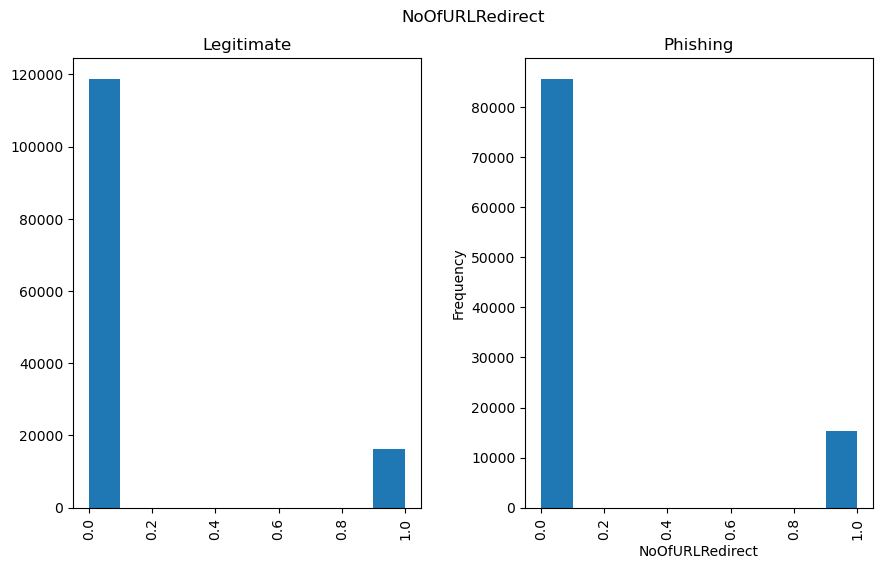

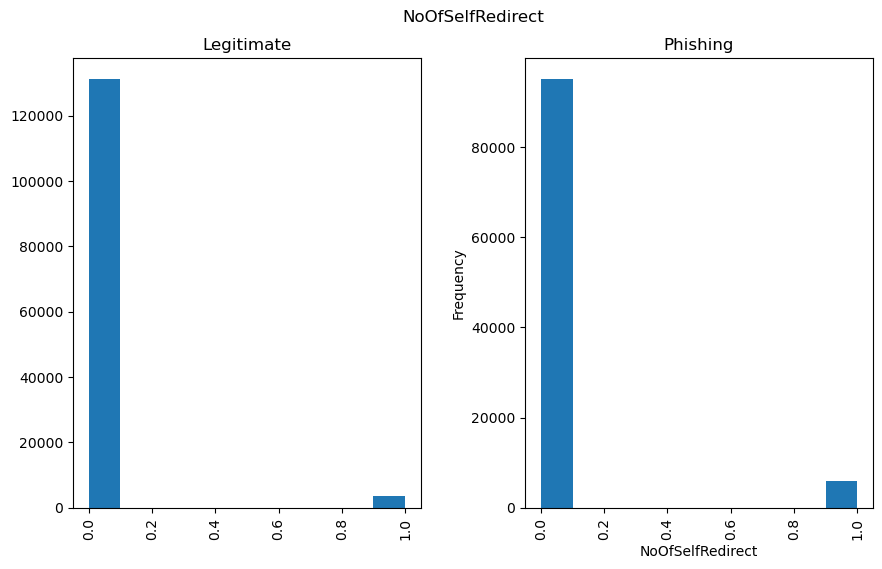

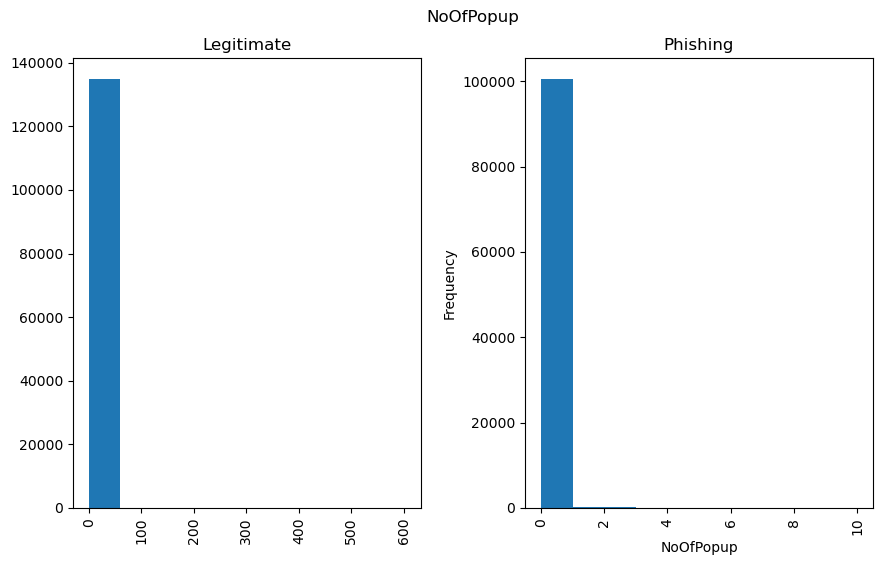

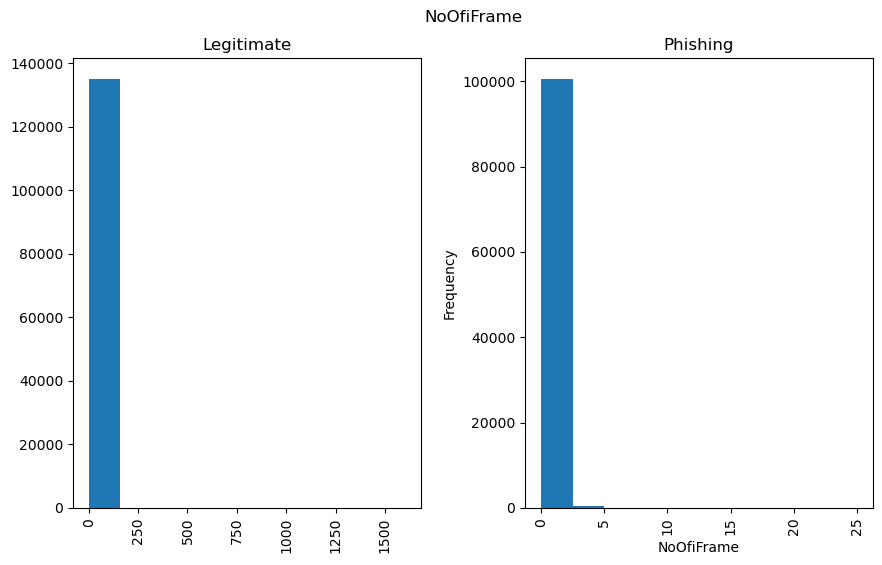

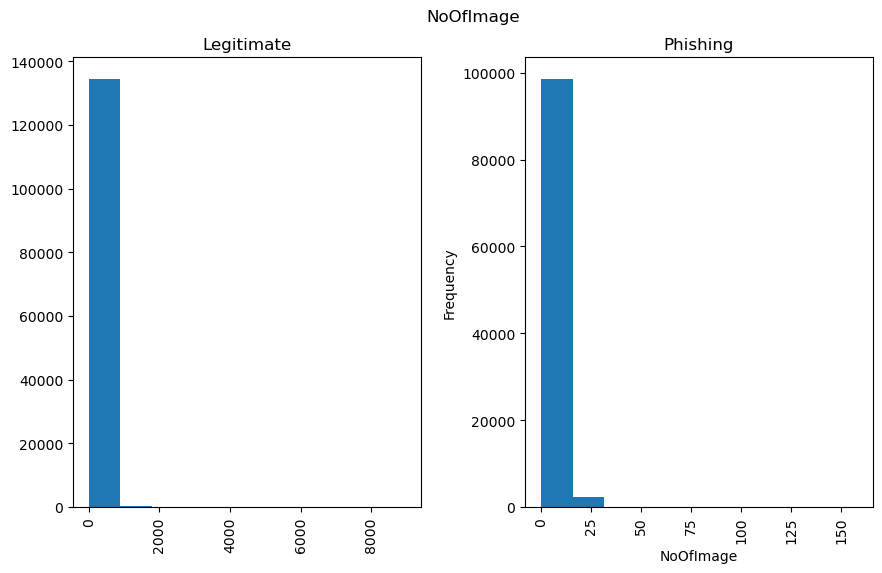

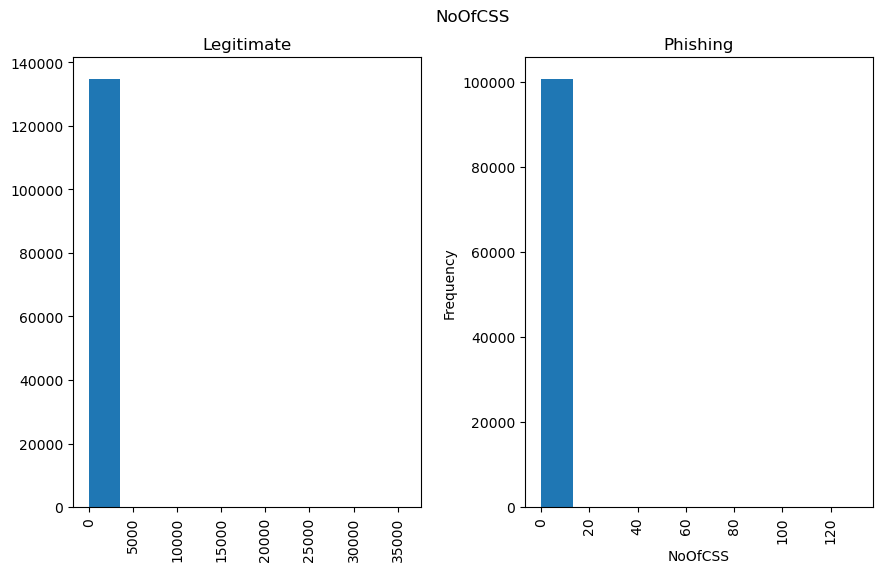

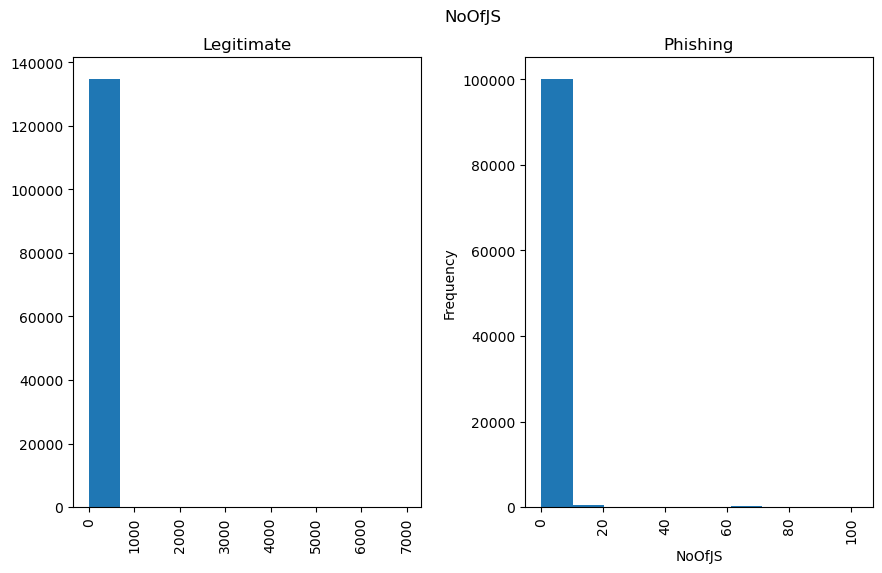

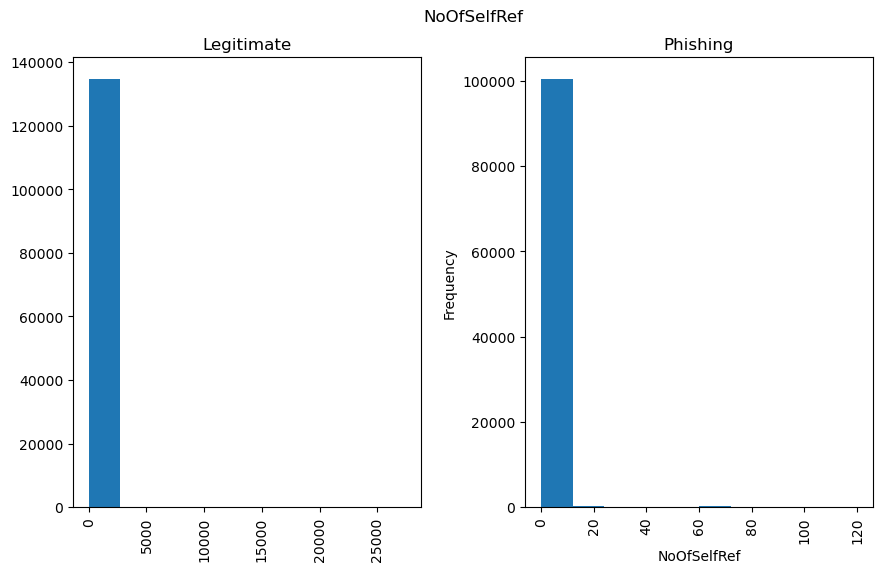

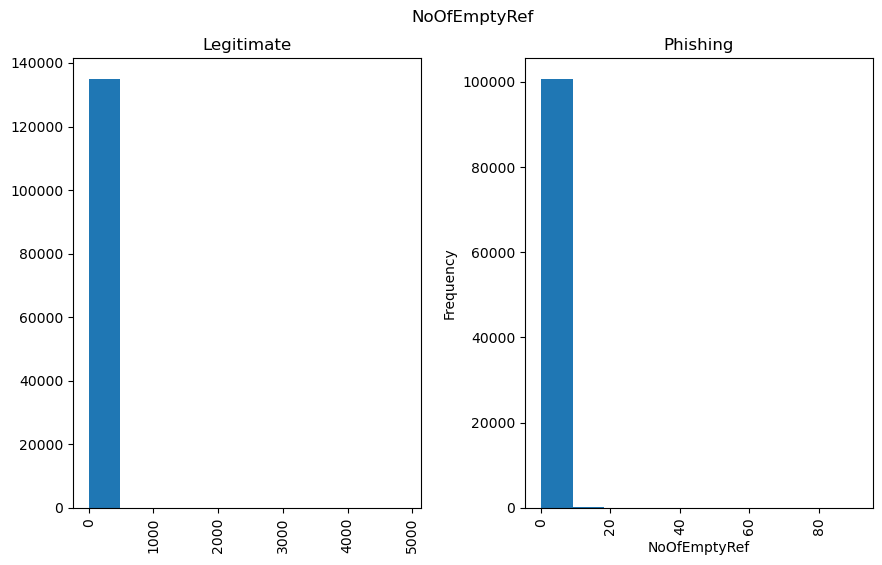

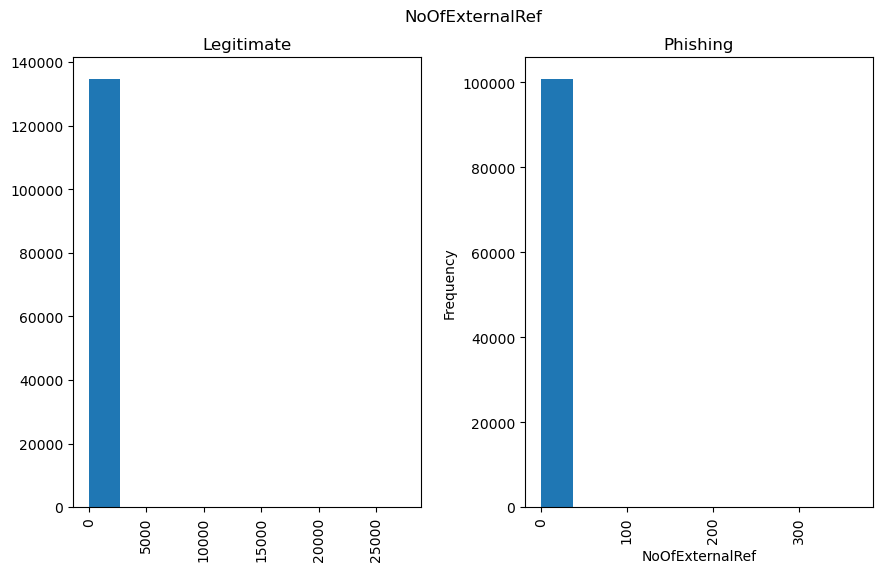

In [27]:
# Plot histograms for each hist_column, colored by the label column
pandas_df = pd.read_csv(DATASET_PATH)
# Define the mapping for the labels
label_mapping = {0: 'Phishing', 1: 'Legitimate'}

# Apply the mapping to create a new column for the textual representation
pandas_df['LabelName'] = pandas_df['label'].map(label_mapping)

# Plot histograms for each specified column, grouped by the textual labels
for i, col in enumerate(hist_columns):

    # Plot the histograms grouped by textual labels
    pandas_df.hist(column=col, by='LabelName', figsize=(10, 6), )
    plt.suptitle(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

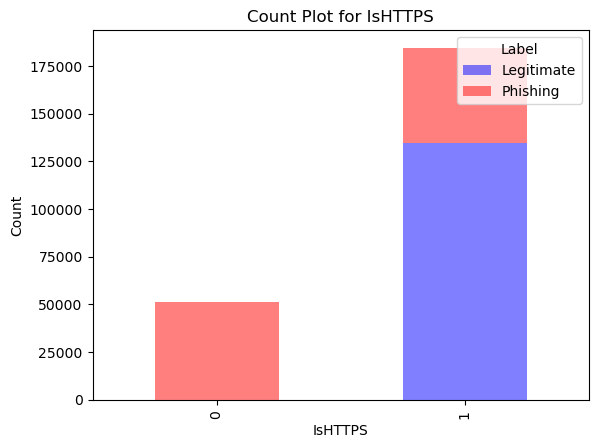

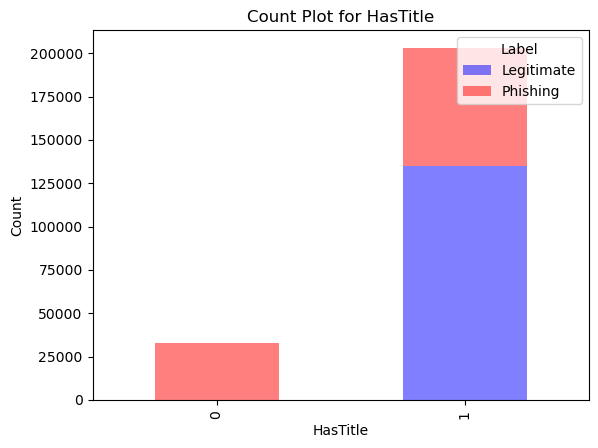

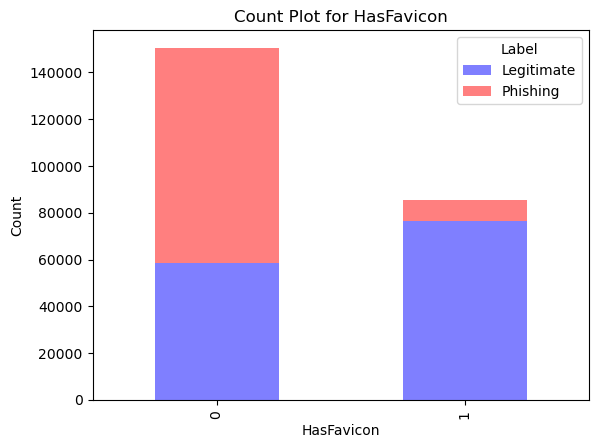

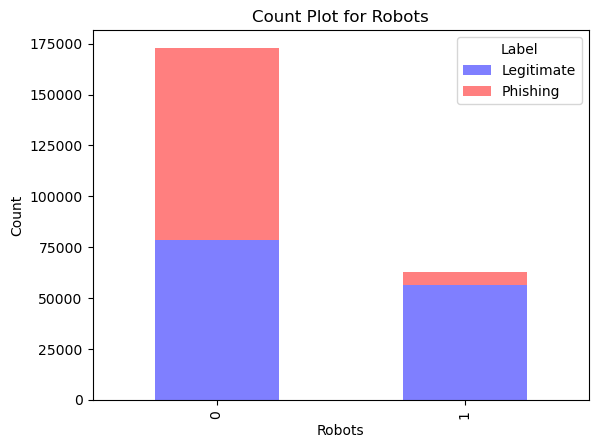

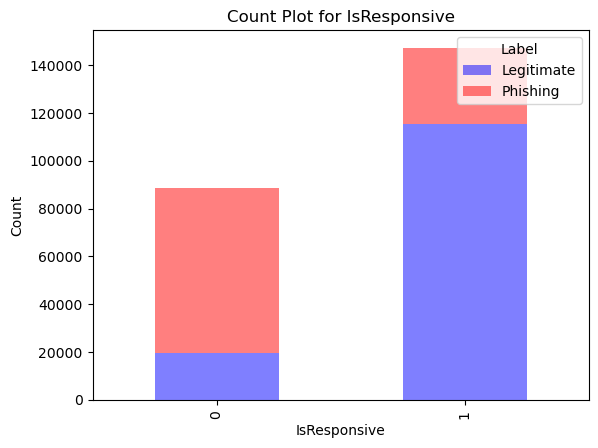

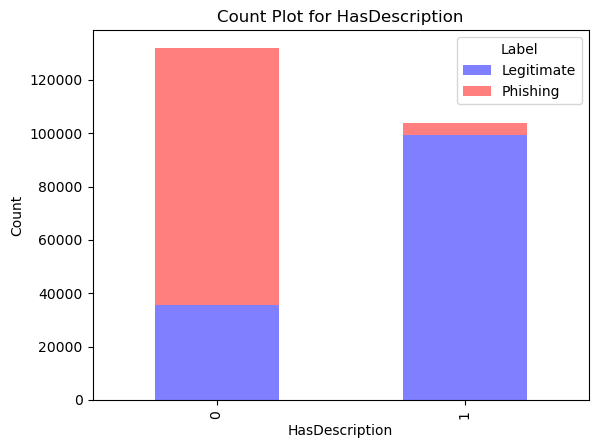

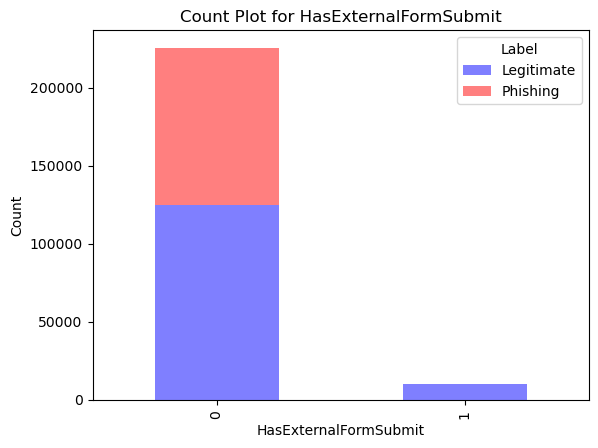

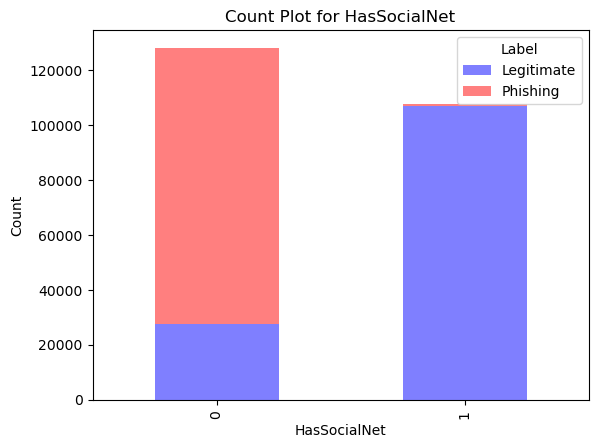

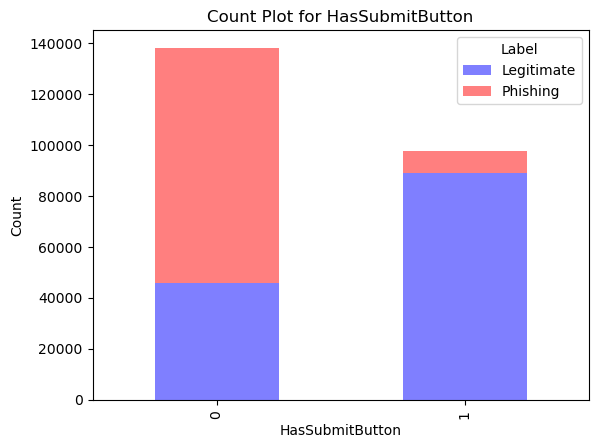

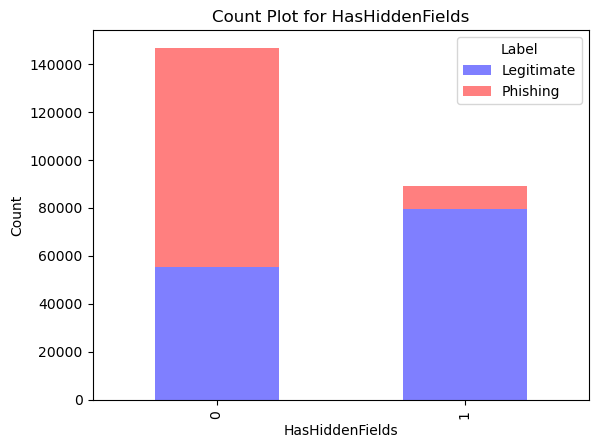

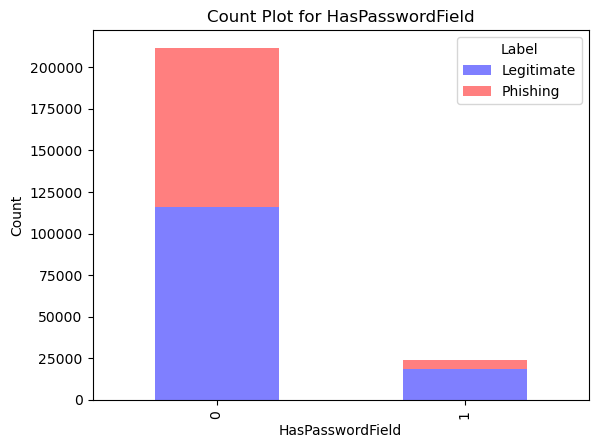

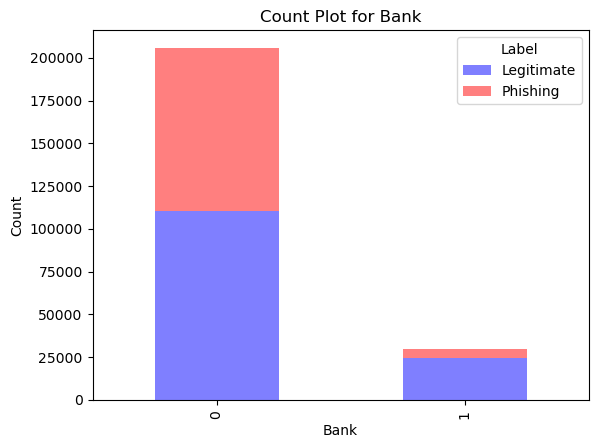

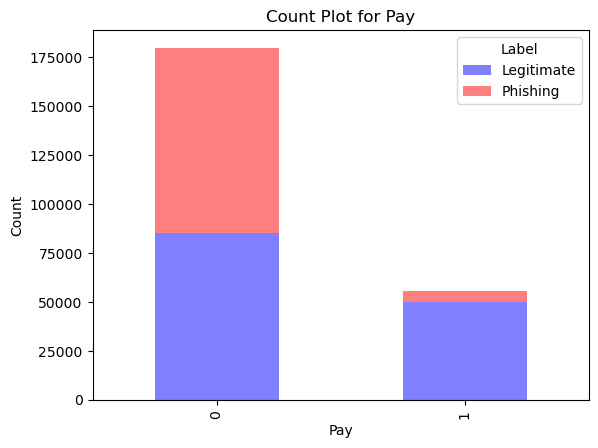

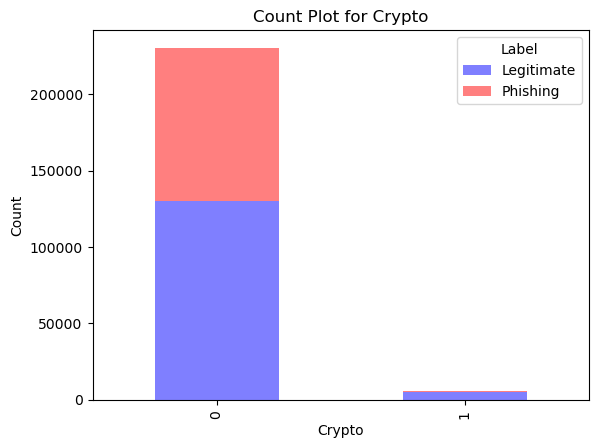

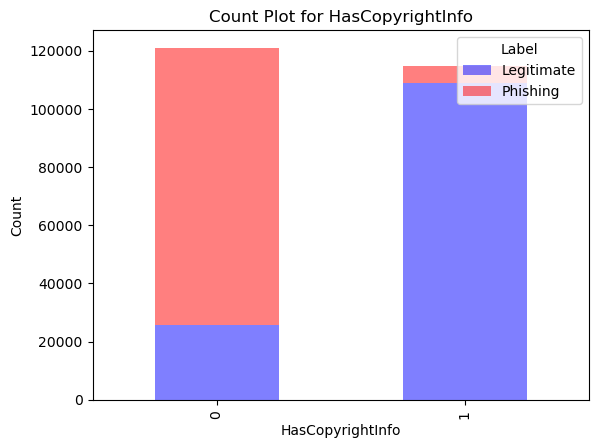

In [34]:

# Plot count plots for each specified binary column, grouped by textual labels
for i, col in enumerate(binary_columns):
    # Restrict the number of plots if needed
    # if i > 0:
    #     break

    # Group by the binary column and the LabelName column to count occurrences
    count_data = pandas_df.groupby([col, 'LabelName']).size().unstack(fill_value=0)

    # Plot the data
    # alpha = 0.5 for colors, colors are blue and red
    count_data.plot(kind='bar', stacked=True, alpha=0.5, color=['blue', 'red'])
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Label', loc='upper right')
    plt.show()

## 3- Model & Training


## 4- Evaluation
